## Problem Statement

With this project, I intend to perform segmentation of customers using PCA and KMeans algorithm. 
Customer segmentation is the process of grouping together customers based on similar characteristics. 
What I wish to achieve at the end of this project is to be able to decide make clusters of customers with similar shopping habits. The deciding factors are income, age, number of people in the household, the visits made to the store, website, number and total purchases made so far.
This is the same dataset and problem that was used earlier by me for clustering using GMM.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [68]:
df=pd.read_csv('marketing_campaign.csv', sep='\t')

In [69]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Distribution of customer education level

In [71]:
education_level_distribution = df['Education'].value_counts()
education_level_distribution

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

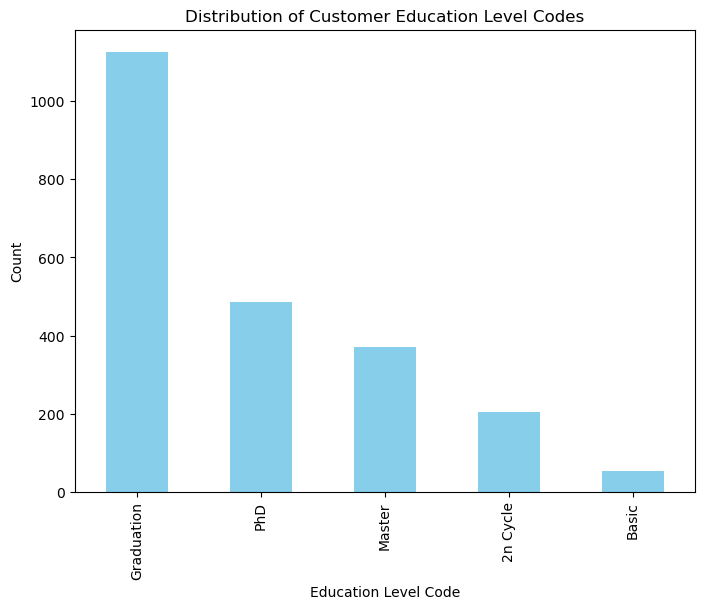

In [72]:
plt.figure(figsize=(8, 6))
education_level_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

# Martial Status

In [73]:
marital_status_distribution = df['Marital_Status'].value_counts()
marital_status_distribution

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

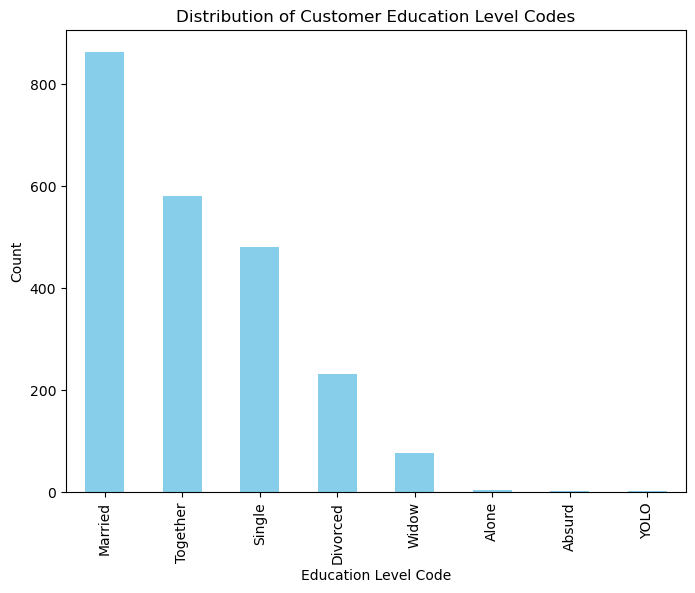

In [74]:
plt.figure(figsize=(8, 6))
marital_status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

In [75]:
average_income = df['Income'].mean()
average_income

52247.25135379061

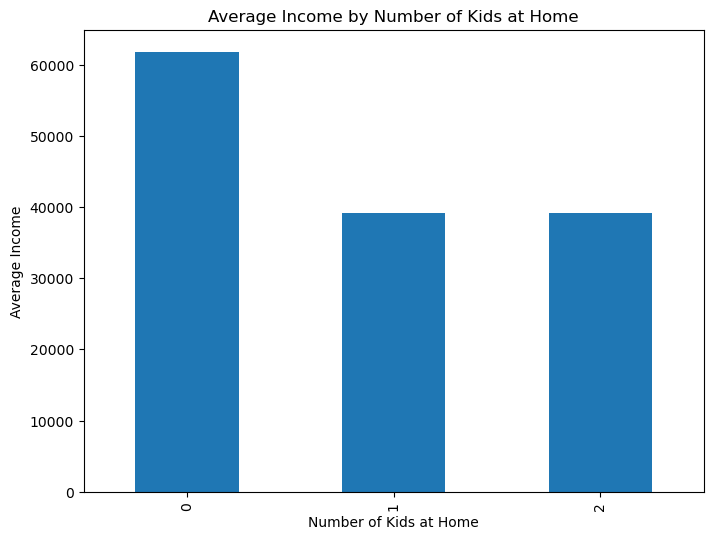

In [76]:
income_by_kids = df.groupby('Kidhome')['Income'].mean()
plt.figure(figsize=(8, 6))
income_by_kids.plot(kind='bar')
plt.title('Average Income by Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Average Income')
plt.show()

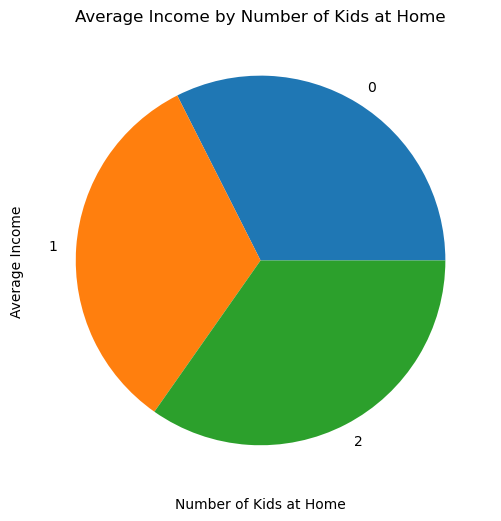

In [77]:
income_by_kids = df.groupby('Teenhome')['Income'].mean()
plt.figure(figsize=(8, 6))
income_by_kids.plot(kind='pie')
plt.title('Average Income by Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Average Income')
plt.show()

In [78]:
income_by_martialstatus = df.groupby('Marital_Status')['Income'].mean()
income_by_martialstatus

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.978996
Single      50995.350318
Together    53245.534031
Widow       56481.552632
YOLO        48432.000000
Name: Income, dtype: float64

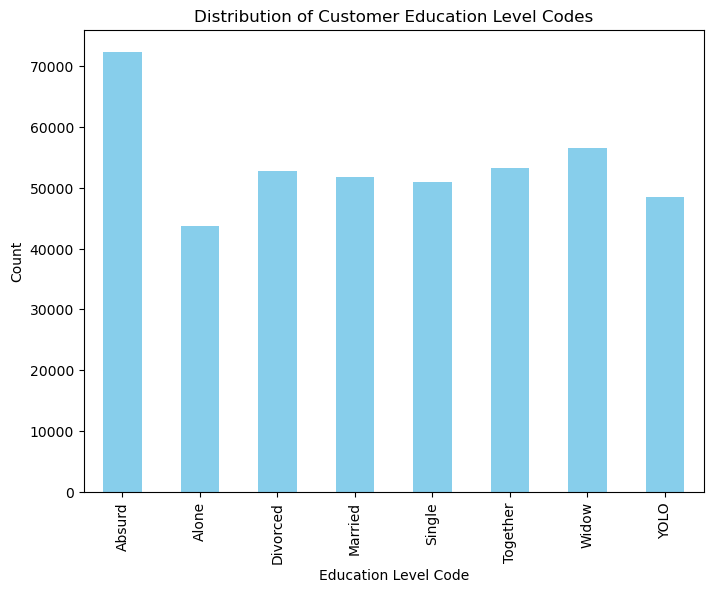

In [79]:
plt.figure(figsize=(8, 6))
income_by_martialstatus.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

In [80]:
income_by_Education = df.groupby('Education')['Income'].mean()
income_by_Education

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

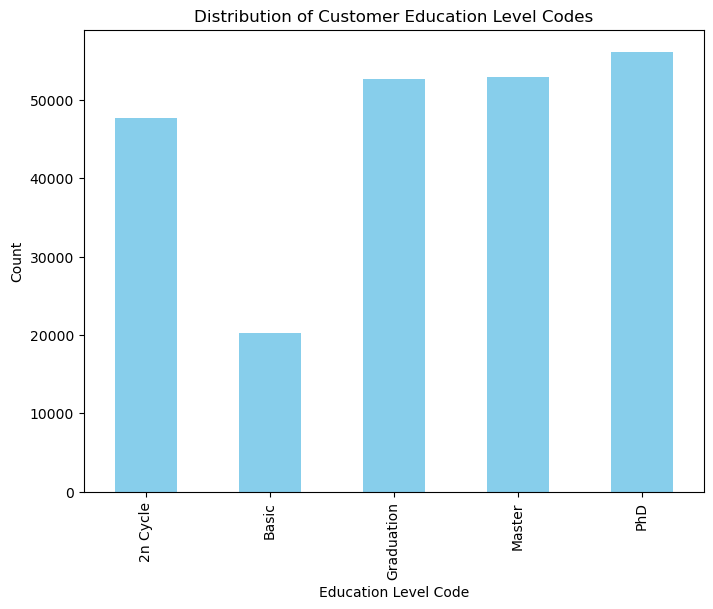

In [81]:
plt.figure(figsize=(8, 6))
income_by_Education.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

In [82]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
current_date = pd.to_datetime(datetime.now().date())
df['Recency'] = (current_date - df['Dt_Customer']).dt.days
df[['Dt_Customer', 'Recency']]


,Dt_Customer,Recency
0,2012-09-04,4300
1,2014-03-08,3750
2,2013-08-21,3949
3,2014-02-10,3776
4,2014-01-19,3798
...,...,...
2235,2013-06-13,4018
2236,2014-06-10,3656
2237,2014-01-25,3792
2238,2014-01-24,3793


In [83]:
correlation = df['Recency'].corr(df['Income'])
correlation

-0.018530776603923955

In [84]:
import seaborn as sns


In [85]:
columns_of_interest = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                       'MntSweetProducts', 'MntGoldProds']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,0.022431,-0.030128,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818
Income,-0.161791,1.000000,-0.428669,0.019133,-0.018531,-0.027225,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916
Kidhome,0.230176,-0.428669,1.000000,-0.036133,-0.053343,0.040207,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.017465,0.003138,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725
Recency,0.022431,-0.018531,-0.053343,0.017465,1.000000,0.033120,0.166264,0.066928,0.092713,0.080769,0.081268,0.159596
Complain,-0.030128,-0.027225,0.040207,0.003138,0.033120,1.000000,-0.039007,-0.005166,-0.023483,-0.020953,-0.022485,-0.030861
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.166264,-0.039007,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,0.066928,-0.005166,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.092713,-0.023483,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.080769,-0.020953,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875


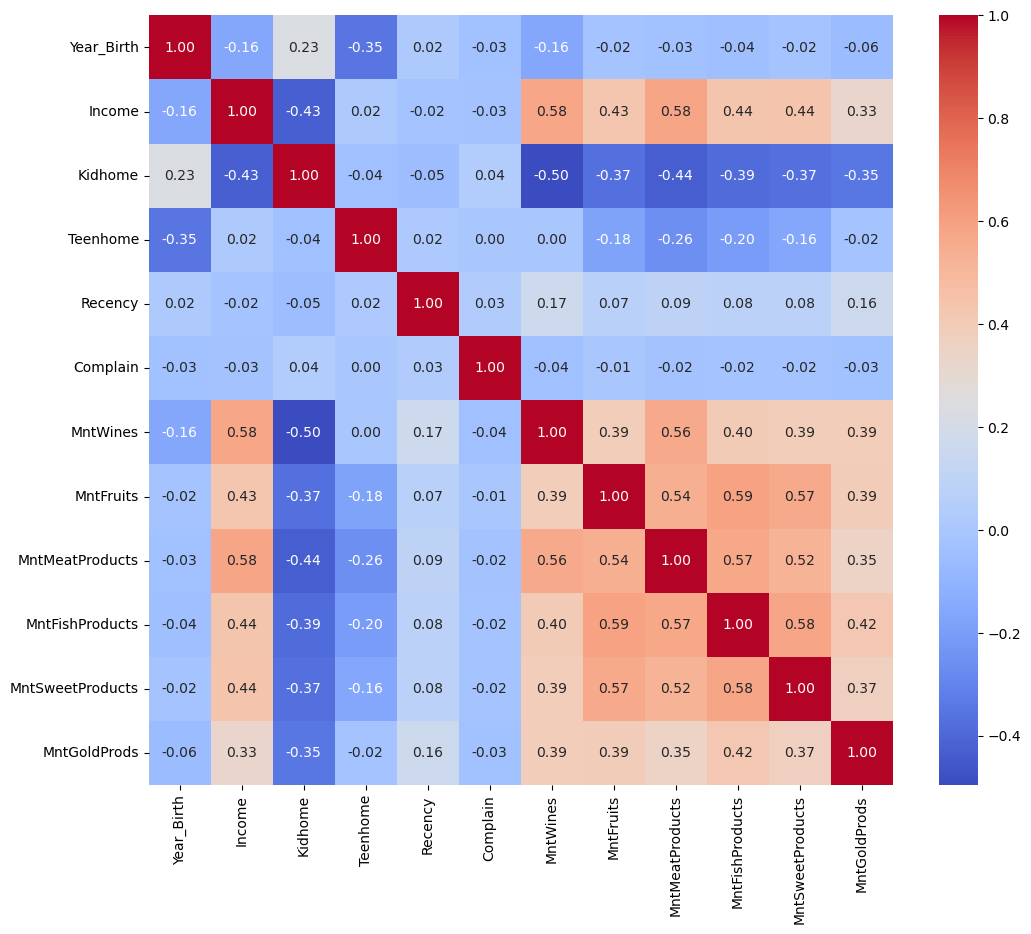

In [86]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

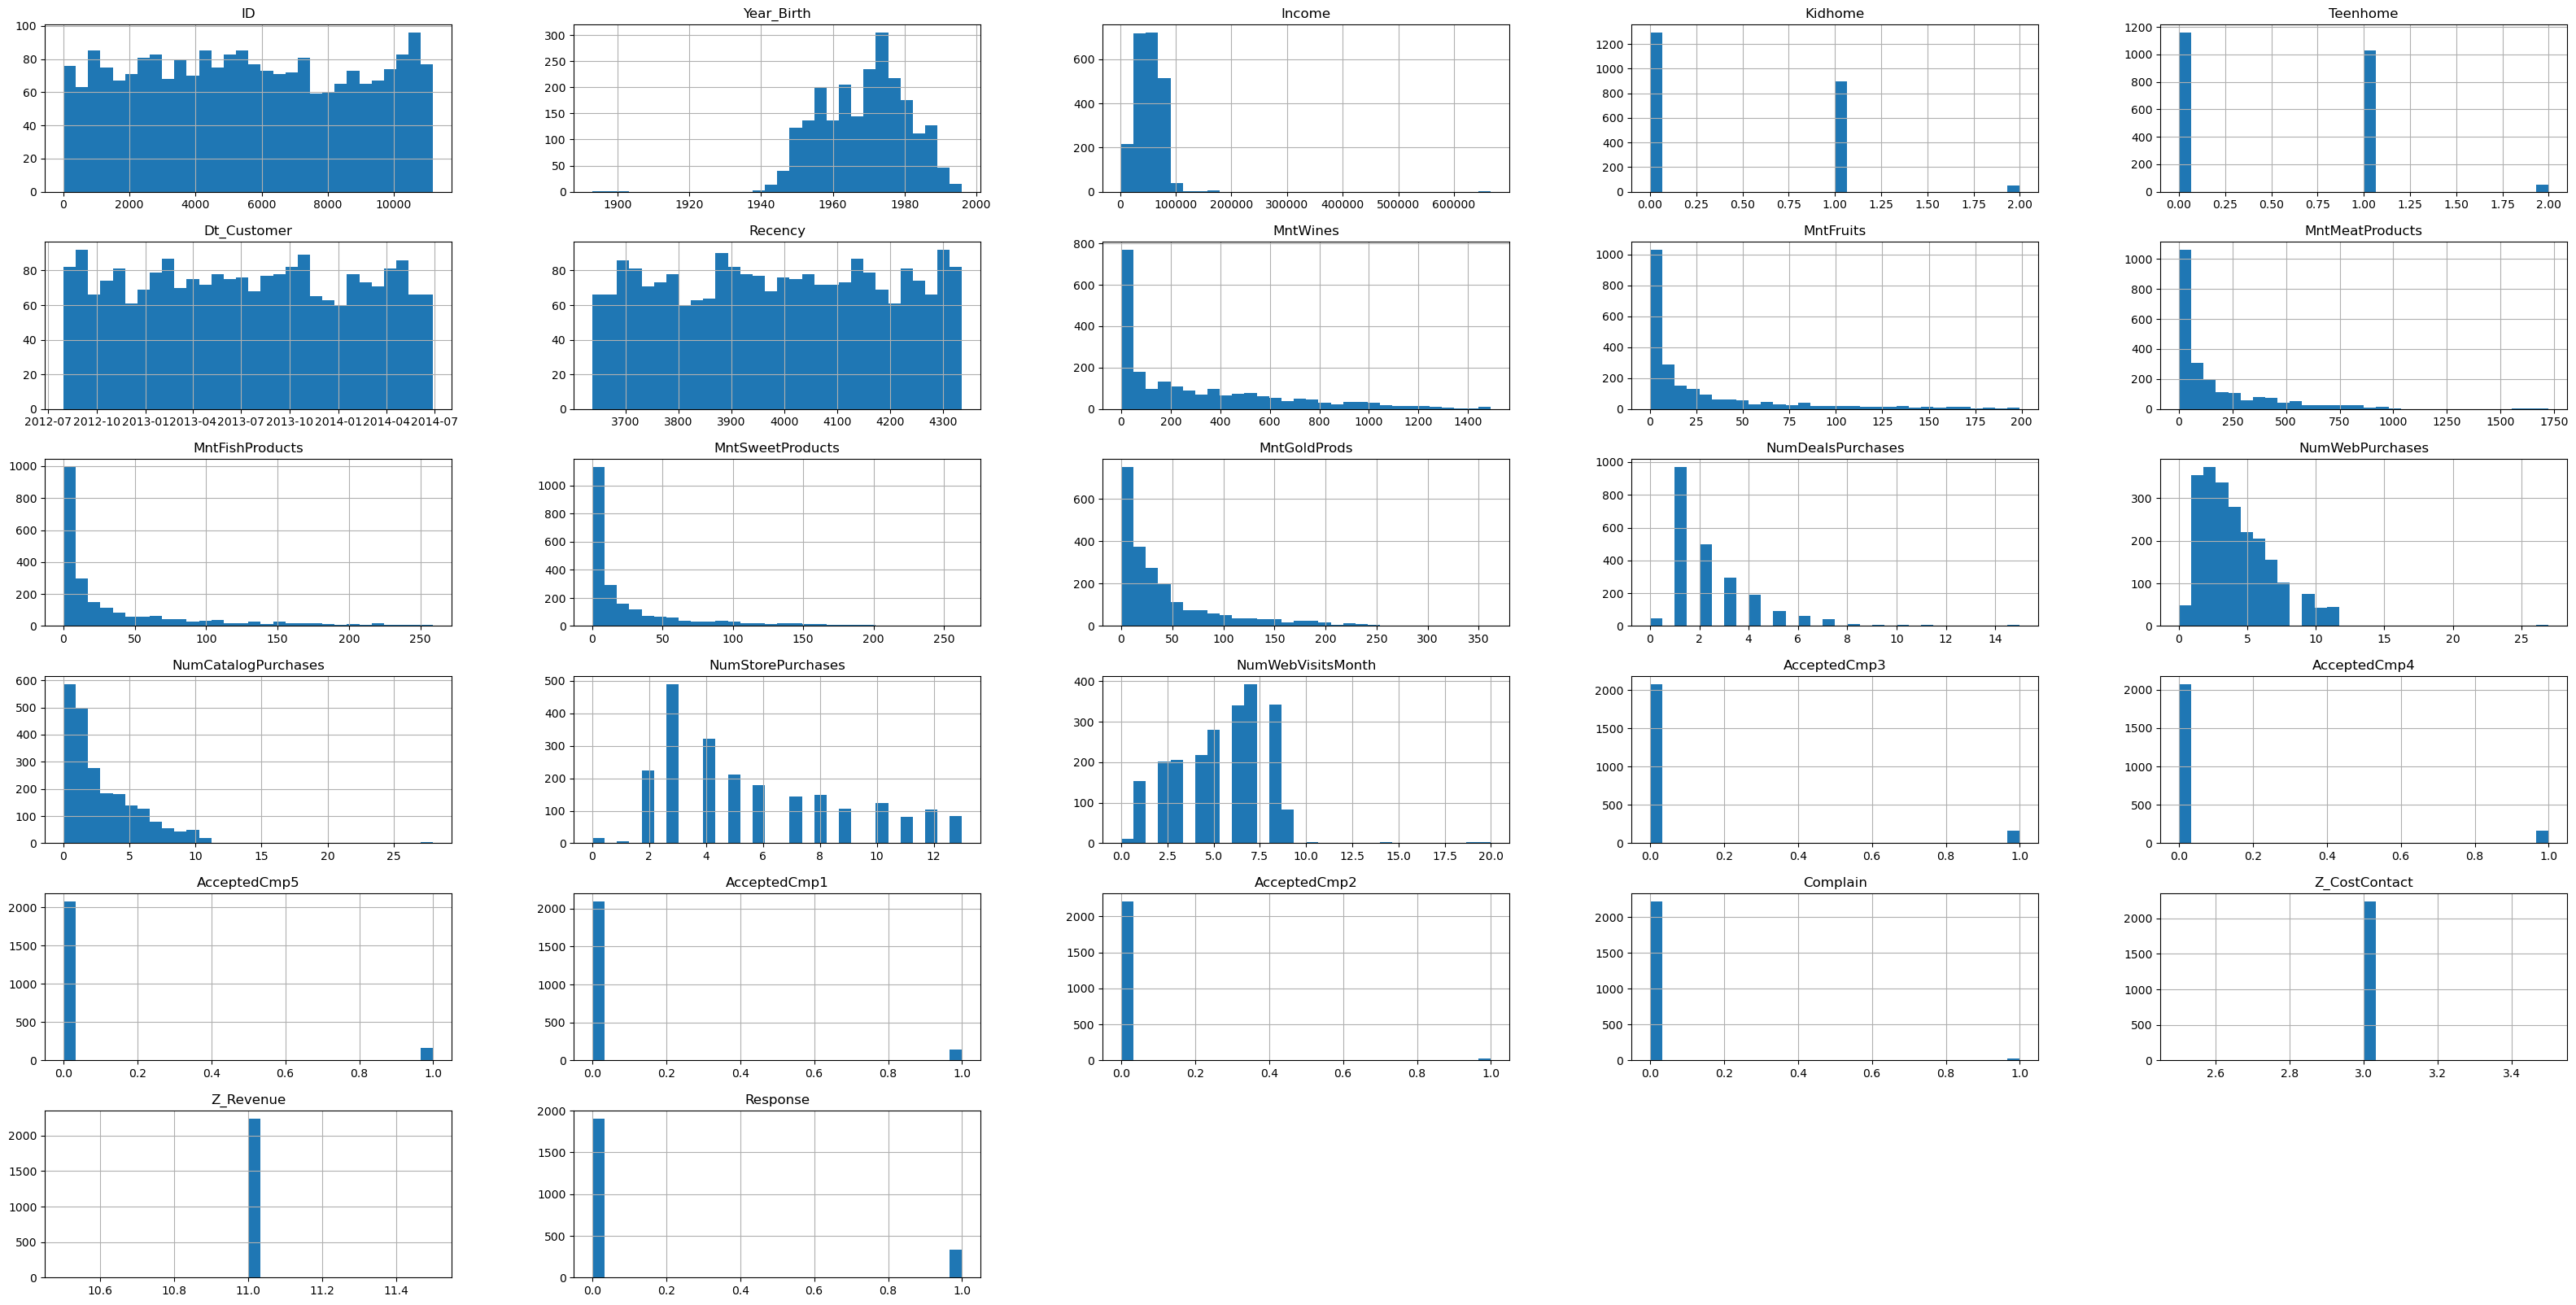

In [87]:
df.hist(bins=30, figsize=(40, 20))
plt.show()

In [88]:
maxincome=df['Income'].std()*3

In [89]:
df[df['Income']>maxincome +5000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,4219,1006,...,3,0,0,1,1,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,3856,684,...,2,0,0,1,0,0,0,3,11,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,3659,510,...,1,1,0,0,1,0,0,3,11,1
55,6260,1955,Master,Together,82384.0,0,0,2012-11-19,4224,984,...,1,0,0,1,0,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,3739,688,...,5,1,0,0,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,4237,556,...,3,1,0,0,1,0,0,3,11,1
2211,10469,1981,Graduation,Together,88325.0,0,0,2014-02-05,3781,519,...,2,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,4262,594,...,2,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-04-05,3722,332,...,1,0,0,0,0,0,0,3,11,0


In [90]:
amounts=df.columns.tolist()[9:15]

In [91]:
df[amounts].sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [92]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [93]:
coupons=df.columns.tolist()[20:25]
df[coupons].sum()

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

In [94]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [95]:
df['NumCatalogPurchases'].value_counts()

0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

<Axes: >

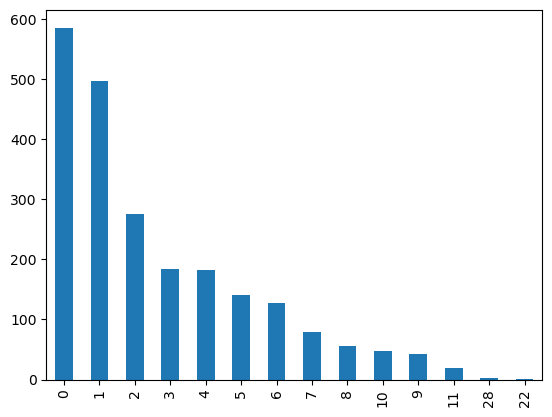

In [96]:
df['NumCatalogPurchases'].value_counts().plot(kind='bar')

In [97]:
visits=df.columns.tolist()[16:19]
df[visits]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
...,...,...,...
2235,9,3,4
2236,8,2,5
2237,2,3,13
2238,6,5,10


<Axes: >

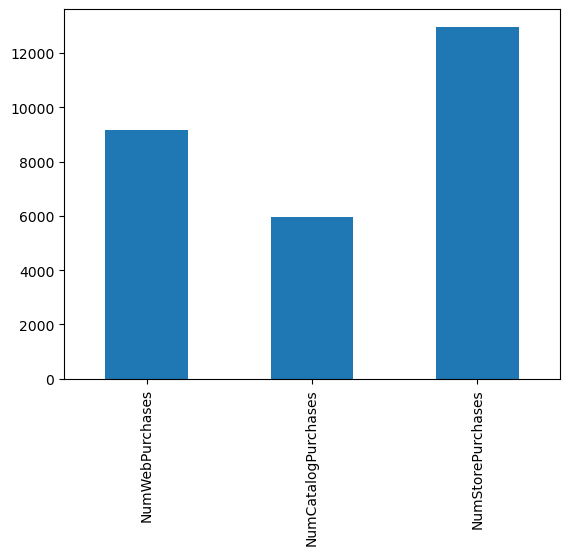

In [98]:
df[visits].sum().plot(kind='bar')

In [99]:
pd.crosstab(df.Education, df.Income)

Income,1730.0,2447.0,3502.0,4023.0,4428.0,4861.0,5305.0,5648.0,6560.0,6835.0,...,105471.0,113734.0,153924.0,156924.0,157146.0,157243.0,157733.0,160803.0,162397.0,666666.0
Education,,,,,,,,,,,,,,,,,,,,,
2n Cycle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Graduation,1,1,1,0,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
Master,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
PhD,0,0,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


In [100]:
df.groupby("Education").describe()["Income"].mean()

count       443.200000
mean      45944.534218
std       19460.421864
min        5462.600000
25%       31195.450000
50%       45146.500000
75%       59205.950000
max      223557.600000
dtype: float64

In [101]:
df.groupby("Education")["Income"].mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [102]:
df.groupby("Marital_Status")["Income"].mean()

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.978996
Single      50995.350318
Together    53245.534031
Widow       56481.552632
YOLO        48432.000000
Name: Income, dtype: float64

In [103]:
pd.crosstab(df.Income,df.Teenhome)

Teenhome,0,1,2
Income,,,
1730.0,1,0,0
2447.0,1,0,0
3502.0,1,0,0
4023.0,0,1,0
4428.0,0,1,0
...,...,...,...
157243.0,0,1,0
157733.0,1,0,0
160803.0,1,0,0


In [104]:
df.groupby(visits).describe()

ID                \
                                                      count          mean   
NumWebPurchases NumCatalogPurchases NumStorePurchases                       
0               0                   0                   6.0   8099.000000   
                                    1                   3.0   4842.000000   
                                    3                  28.0   7482.857143   
                1                   0                   1.0  10749.000000   
                                    2                   7.0   3335.857143   
...                                                     ...           ...   
11              10                  11                  2.0   4640.000000   
                11                  5                   1.0   4299.000000   
23              1                   1                   1.0   6237.000000   
25              0                   0                   1.0  10311.000000   
27              0                   0                   2.0   4937.000000   

                                                                             \
                                                               std      min   
NumWebPurchases NumCatalogPurchases NumStorePurchases                         
0               0                   0                  3069.068588   3955.0   
                                    1                  3638.566064   1503.0   
                                    3                  2776.182467     73.0   
                1                   0                          NaN  10749.0   
                                    2                  2869.855132    624.0   
...                                                            ...      ...   
11              10                  11                  725.491557   4127.0   
                11                  5                          NaN   4299.0   
23              1                   1                          NaN   6237.0   
25              0                   0                          NaN  10311.0   
27              0                   0                   449.719913   4619.0   

                                                                          \
                                                            25%      50%   
NumWebPurchases NumCatalogPurchases NumStorePurchases                      
0               0                   0                   5881.75   8396.5   
                                    1                   2903.00   4303.0   
                                    3                   6341.50   8255.0   
                1                   0                  10749.00  10749.0   
                                    2                   1484.50   2518.0   
...                                                         ...      ...   
11              10                  11                  4383.50   4640.0   
                11                  5                   4299.00   4299.0   
23              1                   1                   6237.00   6237.0   
25              0                   0                  10311.00  10311.0   
27              0                   0                   4778.00   4937.0   

                                                                          \
                                                            75%      max   
NumWebPurchases NumCatalogPurchases NumStorePurchases                      
0               0                   0                  10815.25  11181.0   
                                    1                   6511.50   8720.0   
                                    3                   9528.00  10492.0   
                1                   0                  10749.00  10749.0   
                                    2                   4435.50   8369.0   
...                                                         ...      ...   
11              10                  11                  4896.50   5153.0   
                11                  5         

In [105]:
df["total_amounts"]=df[amounts].sum(axis=1)
df["total_amounts"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_amounts, Length: 2240, dtype: int64

In [106]:
df[amounts][0:1].sum(axis=1)

0    1617
dtype: int64

In [107]:
pd.crosstab(df.Marital_Status,df["total_amounts"]) #not true must be made by group by

total_amounts,5,6,8,9,10,11,12,13,14,15,...,2279,2283,2302,2346,2349,2352,2440,2486,2524,2525
Marital_Status,,,,,,,,,,,,,,,,,,,,,
Absurd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Divorced,0,2,1,0,0,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
Married,0,0,1,1,1,2,0,1,1,2,...,0,0,0,1,0,1,1,1,0,0
Single,1,0,0,0,1,0,0,1,1,2,...,0,0,0,0,1,0,0,0,0,2
Together,0,0,2,1,3,2,2,2,0,4,...,1,1,2,0,0,0,0,0,1,0
Widow,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
YOLO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df.groupby("Marital_Status")["total_amounts"].sum()

Marital_Status
Absurd        2385
Alone          770
Divorced    141666
Married     510453
Single      291112
Together    352865
Widow        56889
YOLO           848
Name: total_amounts, dtype: int64

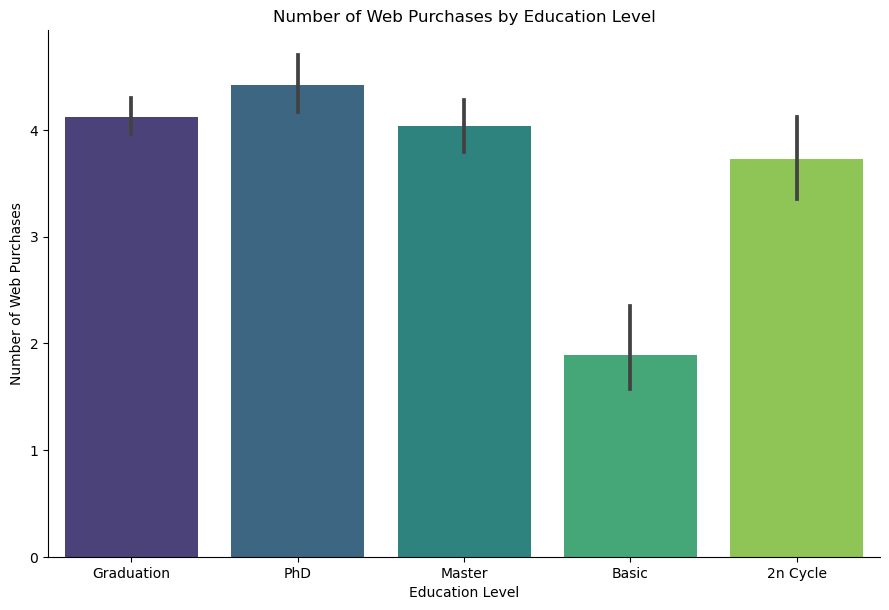

In [109]:
g = sns.catplot(x="Education", y="NumWebPurchases", kind="bar", data=df, height=6, aspect=1.5, palette="viridis")
g.set_ylabels("Number of Web Purchases")
g.set_xlabels("Education Level")
g.set(title="Number of Web Purchases by Education Level")
plt.show()

In [110]:
df.drop(["ID","Year_Birth","Z_CostContact","Z_Revenue","Dt_Customer"], axis=1, inplace=True)


In [111]:
education_ctgrs = pd.Categorical(df["Education"], categories=["Basic", "Graduation", "2n Cycle", "Master", "PhD"], ordered=True)
df["educations"], CAT = pd.factorize(education_ctgrs, sort=True)

In [112]:
df[["Education","educations"]]


,Education,educations
0,Graduation,1
1,Graduation,1
2,Graduation,1
3,Graduation,1
4,PhD,4
...,...,...
2235,Graduation,1
2236,PhD,4
2237,Graduation,1
2238,Master,3


In [113]:
df.drop(["Education"],axis=1, inplace=True)
df.head()

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amounts,educations
0,Single,58138.0,0,0,4300,635,88,546,172,88,...,7,0,0,0,0,0,0,1,1617,1
1,Single,46344.0,1,1,3750,11,1,6,2,1,...,5,0,0,0,0,0,0,0,27,1
2,Together,71613.0,0,0,3949,426,49,127,111,21,...,4,0,0,0,0,0,0,0,776,1
3,Together,26646.0,1,0,3776,11,4,20,10,3,...,6,0,0,0,0,0,0,0,53,1
4,Married,58293.0,1,0,3798,173,43,118,46,27,...,5,0,0,0,0,0,0,0,422,4


In [114]:
df = df.replace(to_replace="Single",value=0)
df = df.replace(to_replace="Divorced",value=0)
df = df.replace(to_replace="Widow",value=0)
df = df.replace(to_replace="Alone",value=0)
df = df.replace(to_replace="Absurd",value=0)
df = df.replace(to_replace="YOLO",value=0)
df = df.replace(to_replace="Married",value=1)
df = df.replace(to_replace="Together",value=1)


In [115]:
df.isna().sum()

Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
total_amounts           0
educations              0
dtype: int64

In [116]:
df['Income'].fillna(df['Income'].mean(), inplace=True)


In [117]:
df = df.drop(df[df.Income > 400000].index)


In [118]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [119]:
pca = PCA(n_components=2, whiten=True)
pca.fit(scaled_df)
data_pca = pca.transform(scaled_df)
print("Explained Variance Ratios: ", pca.explained_variance_ratio_)
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratios:  [0.30381035 0.0820282 ]
Total Explained Variance:  0.3858385529892978


In [120]:
data_pca


array([[ 1.49573553,  0.32134593],
       [-0.96688235, -0.64603987],
       [ 0.5878803 , -0.46387699],
       ...,
       [ 0.64809564,  0.05178403],
       [ 0.62631804,  0.03068537],
       [-0.64952973,  1.0527657 ]])

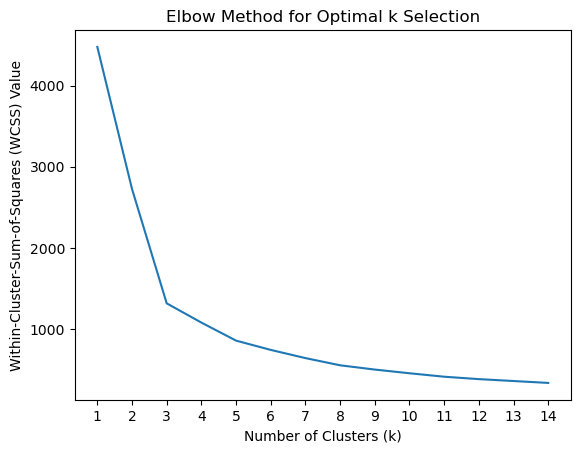

In [121]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.xlabel("Number of Clusters (k)")
plt.xticks(range(1, 15, 1))
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS) Value")
plt.title("Elbow Method for Optimal k Selection")
plt.show()

In [122]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data_pca)

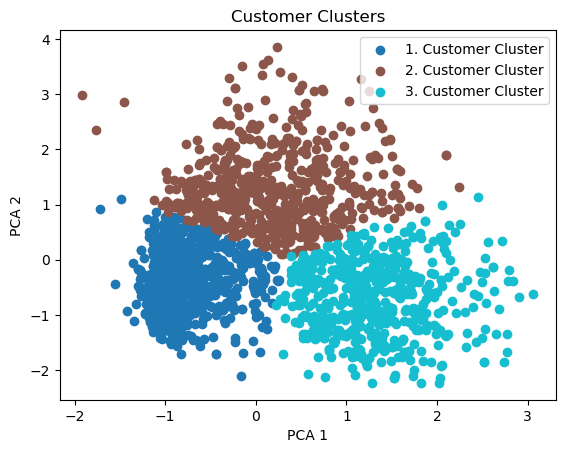

In [123]:
colors = plt.cm.get_cmap('tab10', 3)
for cluster_num in range(3):
    plt.scatter(data_pca[clusters == cluster_num, 0], 
                data_pca[clusters == cluster_num, 1], 
                label=f'{cluster_num + 1}. Customer Cluster', 
                color=colors(cluster_num))

plt.title('Customer Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [125]:
sil_score = silhouette_score(data_pca, clusters)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.515
